In [1]:
import matplotlib.pyplot as plt
import pydicom
from pydicom.data import get_testdata_files
import pandas as pd
from os import listdir
from os.path import isfile, join
from os import walk
import os
from glob import glob
import joblib

## 讀取keys

In [24]:
df_key = pd.read_csv(r'\\cxlsvr936\數據經營部\風險分\YK_TEMP\2021BFX\data\BFX_keys.csv', encoding='MBCS')[['filename', 'PART', 'LEVEL']]

In [25]:
df_key

,filename,PART,LEVEL
0,BFX_000000,臂骨（肱骨內上髁、外上髁骨）,龜裂
1,BFX_000001,臂骨（肱骨內上髁、外上髁骨）,龜裂
2,BFX_000002,臂骨（肱骨內上髁、外上髁骨）,龜裂
3,BFX_000003,臂骨（肱骨內上髁、外上髁骨）,龜裂
4,BFX_000004,臂骨（肱骨內上髁、外上髁骨）,龜裂
...,...,...,...
2975,BFX_047524,蹠骨,完全骨折
2976,BFX_047525,蹠骨,完全骨折
2977,BFX_047526,蹠骨,完全骨折
2978,BFX_047527,肋骨,龜裂


In [26]:
df_key[df_key['filename']=='BFX_000017']

,filename,PART,LEVEL
17,BFX_000017,掌骨,完全骨折


## 讀取dicom

In [27]:
ds = pydicom.dcmread(r'\\cxlsvr936\數據經營部\風險分\YK_TEMP\2021BFX\data\dicom\train\BFX_000017.DICOM')

SOP Class........: 1.2.840.10008.5.1.4.1.1.1.1 (Digital X-Ray Image Storage - For Presentation)

Patient's Name...:          , 
Patient ID.......: 
Modality.........: DX
Study Date.......: 20201029
Image size.......: 1918 x 2092
Pixel Spacing....: [0.122, 0.122]
Slice location...: (missing)


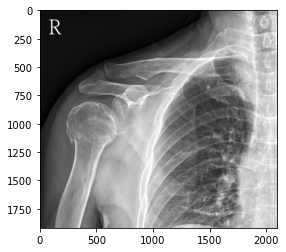

In [28]:
print(f"SOP Class........: {ds.SOPClassUID} ({ds.SOPClassUID.name})")
print()

pat_name = ds.PatientName
display_name = pat_name.family_name + ", " + pat_name.given_name
print(f"Patient's Name...: {display_name}")
print(f"Patient ID.......: {ds.PatientID}")
print(f"Modality.........: {ds.Modality}")
print(f"Study Date.......: {ds.StudyDate}")
print(f"Image size.......: {ds.Rows} x {ds.Columns}")
print(f"Pixel Spacing....: {ds.PixelSpacing}")

# use .get() if not sure the item exists, and want a default value if missing
print(f"Slice location...: {ds.get('SliceLocation', '(missing)')}")

# plot the image using matplotlib
plt.imshow(ds.pixel_array, cmap=plt.cm.gray)
plt.show()

In [29]:
## 完整的dicom tags
ds

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 230
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Digital X-Ray Image Storage - For Presentation
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.392.200046.100.14.14495799750623307317036743979568866993
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.826.0.1.3680043.2.73.0.66168.70
(0002, 0013) Implementation Version Name         SH: 'RUBOANON20191219'
(0002, 0016) Source Application Entity Title     AE: 'RUBOANON'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 192'
(0008, 0008) Image Type                          CS: ['DERIVED', 'PRIMARY', '']
(0008, 0016) SOP Class UID                       UI: Digital X-Ray Image Storage - For Presentation
(0008, 0018) S

## 讀取array

In [30]:
ar = joblib.load(r'\\cxlsvr936\數據經營部\風險分\YK_TEMP\2021BFX\data\array\train\BFX_000017.JOBLIB')

In [31]:
ar

array([[ 225,  230,  230, ..., 3361, 3322, 3294],
       [ 228,  229,  233, ..., 3340, 3346, 3319],
       [ 230,  233,  236, ..., 3298, 3259, 3297],
       ...,
       [ 687,  697,  725, ..., 3405, 3446, 3495],
       [ 681,  697,  712, ..., 3327, 3411, 3454],
       [ 679,  702,  710, ..., 3366, 3197, 3313]], dtype=uint16)

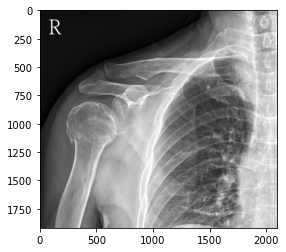

In [32]:
plt.imshow(ar, cmap=plt.cm.gray)
plt.show()